In [1]:
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [5]:
from sklearn.metrics import *
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

ImportError: cannot import name 'TimeseriesGenerator' from 'keras.preprocessing.sequence' (c:\Users\Darsh\OneDrive\Desktop\data science\lstm\lstm\Lib\site-packages\keras\api\preprocessing\sequence\__init__.py)

In [ ]:
import yfinance as yf 
from yfinance import download
from yfinance import Ticker
data = yf.Ticker("AAPL").history(period="1y")

In [7]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-09 00:00:00-04:00,181.702043,183.792180,181.254160,183.702606,48983000,0.00,0.0
2024-05-10 00:00:00-04:00,184.280638,184.470004,181.519927,182.436844,50759500,0.25,0.0
2024-05-13 00:00:00-04:00,184.818838,186.473282,184.001578,185.656021,72044800,0.00,0.0
2024-05-14 00:00:00-04:00,186.881904,187.669266,185.665989,186.802170,52393600,0.00,0.0
2024-05-15 00:00:00-04:00,187.280584,190.011396,186.742384,189.084518,70400000,0.00,0.0
...,...,...,...,...,...,...,...
2025-05-05 00:00:00-04:00,203.100006,204.100006,198.210007,198.889999,69018500,0.00,0.0
2025-05-06 00:00:00-04:00,198.210007,200.649994,197.020004,198.509995,51216500,0.00,0.0
2025-05-07 00:00:00-04:00,199.169998,199.440002,193.250000,196.250000,68616900,0.00,0.0


In [ ]:
data.info


TypeError: 'NoneType' object is not callable

In [14]:
current_data = datetime.now()

In [57]:
start_time = datetime(current_data.year-1, current_data.month, current_data.day - 1) 

In [58]:
current_data

datetime.datetime(2025, 5, 9, 22, 46, 23, 357497)

In [59]:
data = yf.download("AAPL",start=start_time, end=current_data)

[*********************100%***********************]  1 of 1 completed


In [60]:
fig = px.line(data,x= data.index,y="Close",title="Apple stock data")
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')] but received: Close

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-05-08 to 2025-05-09
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   252 non-null    float64
 1   (High, AAPL)    252 non-null    float64
 2   (Low, AAPL)     252 non-null    float64
 3   (Open, AAPL)    252 non-null    float64
 4   (Volume, AAPL)  252 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [62]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,221.999113,224.243005,219.340608,221.613174,5.598740e+07
std,17.175399,16.850993,17.433905,17.333730,3.237783e+07
min,172.419998,182.209646,169.210007,171.949997,2.191157e+07
25%,213.162506,215.202499,209.961109,212.590497,3.959158e+07
50%,224.241394,226.321889,222.508767,224.369714,4.804335e+07
75%,232.686855,234.465108,229.472705,232.642985,6.027682e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


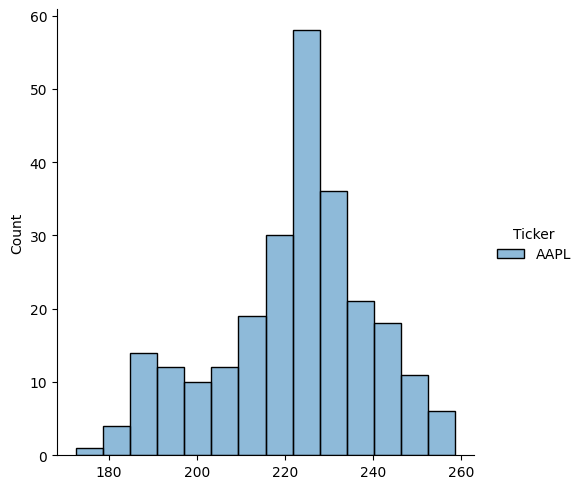

In [63]:
sns.displot(data["Close"])

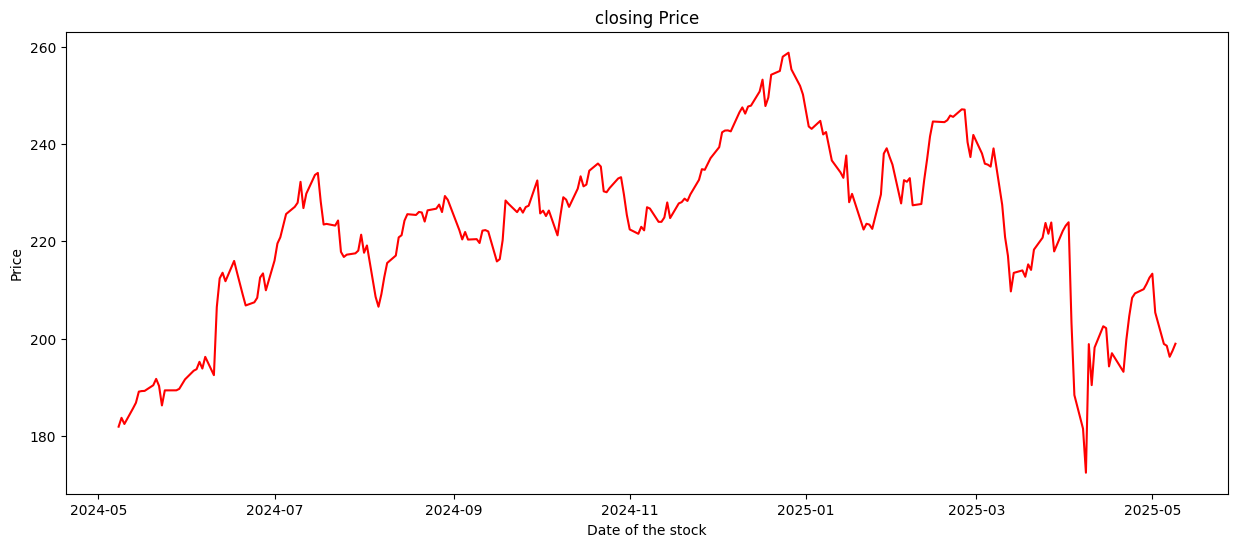

In [64]:
plt.figure(figsize=(15,6))
plt.plot(data.Close,color="red")
plt.title("closing Price")
plt.xlabel("Date of the stock")
plt.ylabel("Price")
plt.show()

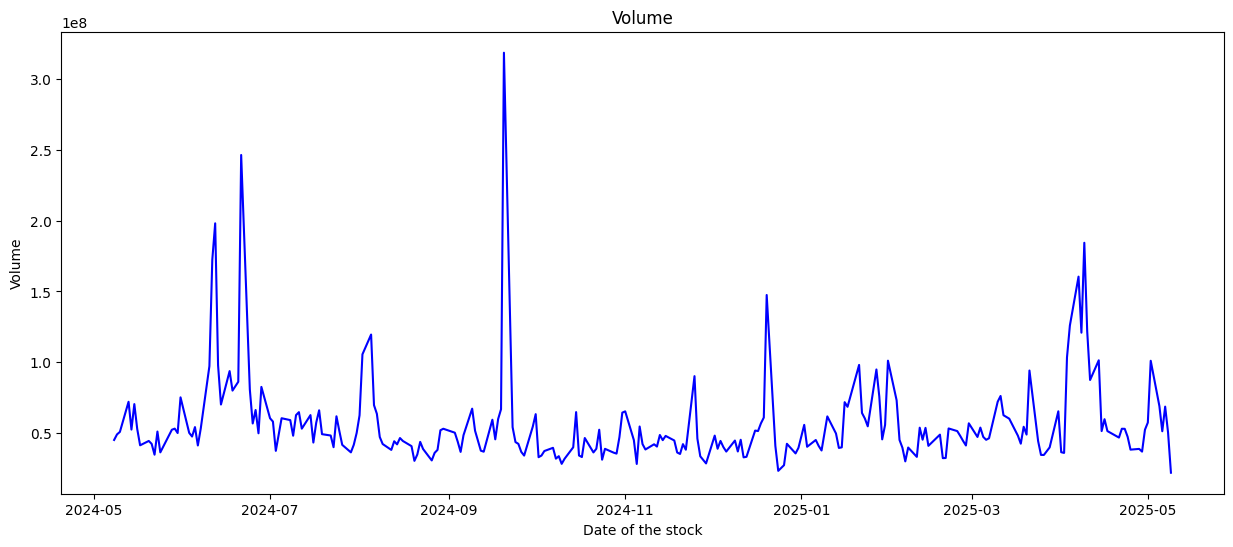

In [65]:
plt.figure(figsize=(15,6))
plt.plot(data["Volume"],color="blue")
plt.title("Volume")
plt.xlabel("Date of the stock") 
plt.ylabel("Volume")
plt.show()

In [4]:
moving_average = [10,20,50]
for x in moving_average:
    column_name = f"MA_{x} for {x } days"
    data[column_name] = data["Close"].rolling(x).mean()


NameError: name 'data' is not defined

In [ ]:
# Check for missing values
data.isnull().sum()

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

In [ ]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
# Create sequences for LSTM
sequence_length = 60
generator = TimeseriesGenerator(train_data, train_data, length=sequence_length, batch_size=32)

In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(generator, epochs=10)

In [ ]:
# Evaluate the model
test_generator = TimeseriesGenerator(test_data, test_data, length=sequence_length, batch_size=32)
predictions = model.predict(test_generator)

In [ ]:
# Visualize predictions
plt.figure(figsize=(15,6))
plt.plot(test_data[sequence_length:], label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()